<a href="https://colab.research.google.com/github/julia-epshtein/liverpatient/blob/main/LiverPatient.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Section 1: Importing Libraries and Content

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Scaling and Balancing
from sklearn import preprocessing
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE

# Libraries required for classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.cluster import k_means

# Libraries required for model evaluation
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import (accuracy_score, 
                             auc, 
                             precision_score,
                             recall_score,
                             f1_score, 
                             roc_curve,
                             roc_auc_score,
                             confusion_matrix)

In [ ]:
from warnings import filterwarnings
filterwarnings('ignore')

In [ ]:
#import dataset and print the data, datatypes of each feature, and statistical data
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Indian Liver Patient Dataset (ILPD).csv',
                 names = ['Age', 'Gender', 'TB', 'DB', 'Alkphos', 'sgpt', 'sgot', 'TP', 'ALB', 'A/G', 'Label'])
print('There are', df['Label'].value_counts()[2], 'non-liver patients compared to', df['Label'].value_counts()[1], 'liver patients\n')
print(df)
print(df.dtypes)
df.describe(include = 'all')

There are 167 non-liver patients compared to 416 liver patients

     Age  Gender    TB   DB  Alkphos  sgpt  sgot   TP  ALB   A/G  Label
0     65  Female   0.7  0.1      187    16    18  6.8  3.3  0.90      1
1     62    Male  10.9  5.5      699    64   100  7.5  3.2  0.74      1
2     62    Male   7.3  4.1      490    60    68  7.0  3.3  0.89      1
3     58    Male   1.0  0.4      182    14    20  6.8  3.4  1.00      1
4     72    Male   3.9  2.0      195    27    59  7.3  2.4  0.40      1
..   ...     ...   ...  ...      ...   ...   ...  ...  ...   ...    ...
578   60    Male   0.5  0.1      500    20    34  5.9  1.6  0.37      2
579   40    Male   0.6  0.1       98    35    31  6.0  3.2  1.10      1
580   52    Male   0.8  0.2      245    48    49  6.4  3.2  1.00      1
581   31    Male   1.3  0.5      184    29    32  6.8  3.4  1.00      1
582   38    Male   1.0  0.3      216    21    24  7.3  4.4  1.50      2

[583 rows x 11 columns]
Age          int64
Gender      object
TB      

,Age,Gender,TB,DB,Alkphos,sgpt,sgot,TP,ALB,A/G,Label
count,583.000000,583,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,579.000000,583.000000
unique,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,441,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,44.746141,NaN,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947064,1.286449
std,16.189833,NaN,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.319592,0.452490
min,4.000000,NaN,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,NaN,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,NaN,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000,1.000000
75%,58.000000,NaN,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,2.000000


# Section 2: Cleaning and Visualizing the Dataset

In [ ]:
#drop rows with missing values 
df.dropna(subset = ['A/G'], axis = 0, inplace = True)

print(df)

     Age  Gender    TB   DB  Alkphos  sgpt  sgot   TP  ALB   A/G  Label
0     65  Female   0.7  0.1      187    16    18  6.8  3.3  0.90      1
1     62    Male  10.9  5.5      699    64   100  7.5  3.2  0.74      1
2     62    Male   7.3  4.1      490    60    68  7.0  3.3  0.89      1
3     58    Male   1.0  0.4      182    14    20  6.8  3.4  1.00      1
4     72    Male   3.9  2.0      195    27    59  7.3  2.4  0.40      1
..   ...     ...   ...  ...      ...   ...   ...  ...  ...   ...    ...
578   60    Male   0.5  0.1      500    20    34  5.9  1.6  0.37      2
579   40    Male   0.6  0.1       98    35    31  6.0  3.2  1.10      1
580   52    Male   0.8  0.2      245    48    49  6.4  3.2  1.00      1
581   31    Male   1.3  0.5      184    29    32  6.8  3.4  1.00      1
582   38    Male   1.0  0.3      216    21    24  7.3  4.4  1.50      2

[579 rows x 11 columns]


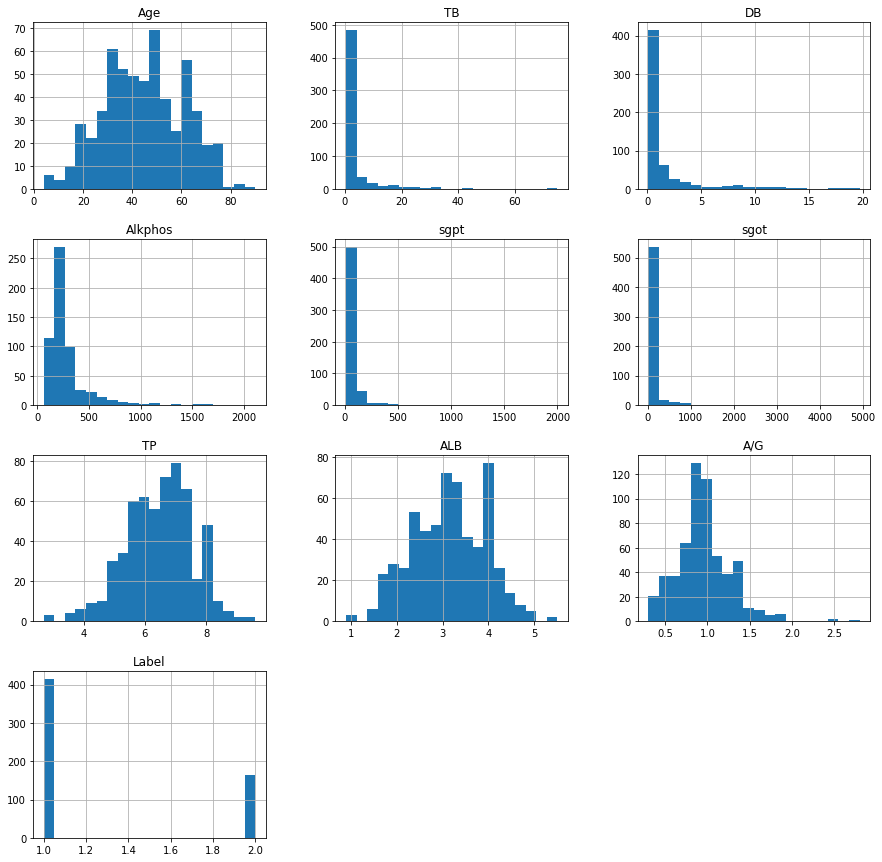

In [ ]:
#Create histograms to see the distribution of each feature
df.hist(bins = 20, figsize = (15,15))
plt.show()

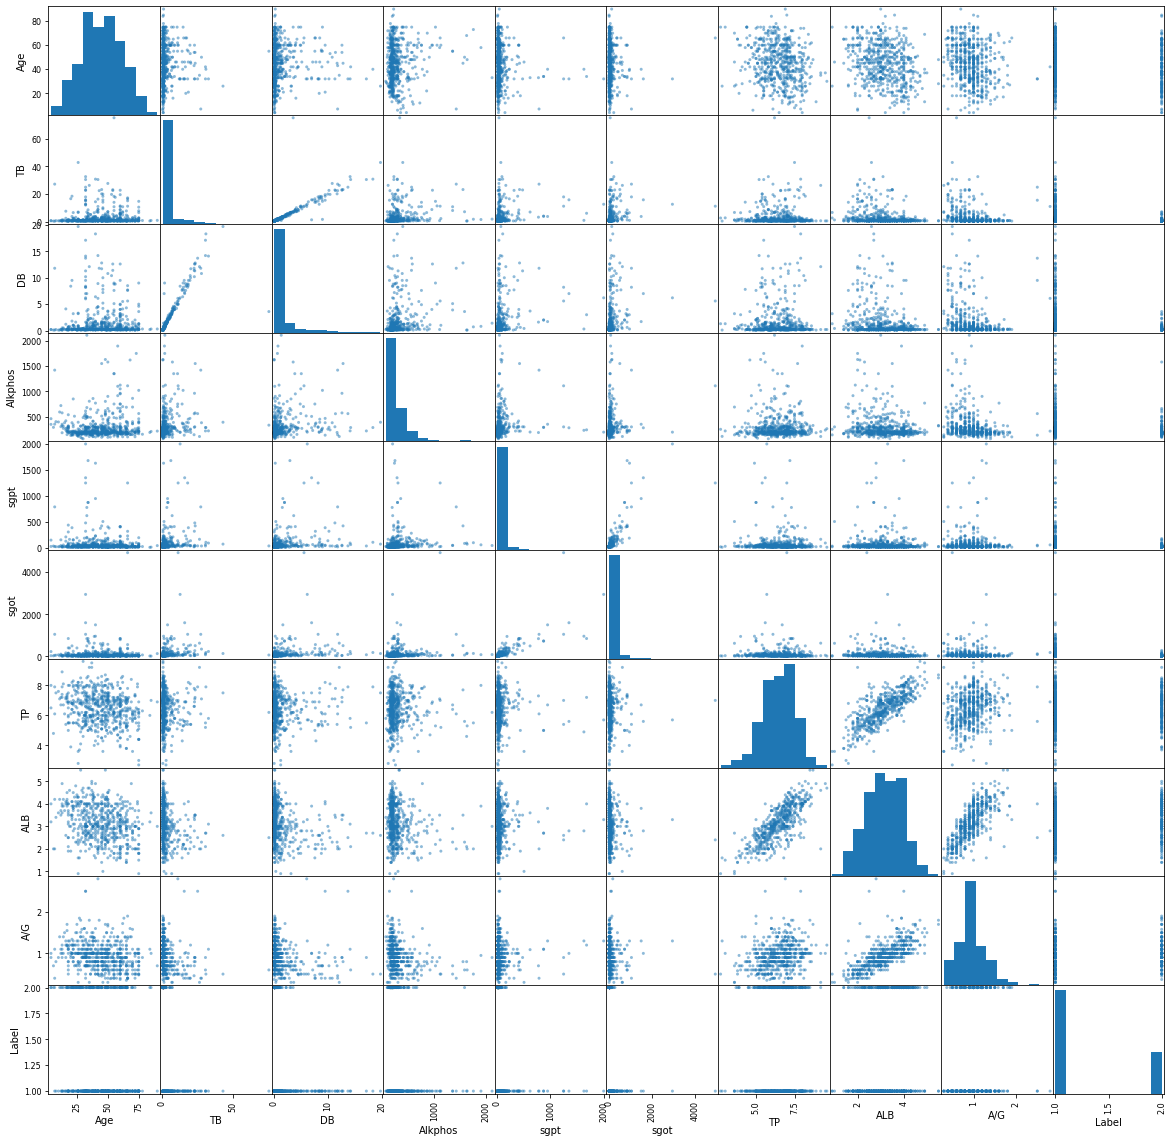

In [ ]:
# Create a scatter matrix to see if there are correlations between any of the variables
# From this rough image, it seems like there is a linear correlation between: TB and DB, TP and ALB, ALB and A/G

pd.plotting.scatter_matrix(df, figsize = (20,20))
plt.show()

In [ ]:
# See if there is any relation between the categorical features (Gender and Label) and the continuous features
for col in df.columns:
  if(col != 'Gender' and col != 'Label'):
    df_test = df[['Gender', 'Label', col]]
    df_grp = df_test.groupby(['Gender', 'Label'], as_index = False).mean()
    print(df_grp, '\n')
# From the results, it seems that liver patients have high levels of TB, DB, Alkphos, sgpt, and A/G

   Gender  Label        Age
0  Female      1  43.329670
1  Female      2  42.897959
2    Male      1  46.938080
3    Male      2  40.715517 

   Gender  Label        TB
0  Female      1  3.116484
1  Female      2  0.912245
2    Male      1  4.480186
3    Male      2  1.243103 

   Gender  Label        DB
0  Female      1  1.393407
1  Female      2  0.269388
2    Male      1  2.083282
3    Male      2  0.450000 

   Gender  Label     Alkphos
0  Female      1  358.010989
1  Female      2  203.755102
2    Male      1  308.696594
3    Male      2  227.836207 

   Gender  Label        sgpt
0  Female      1   68.043956
1  Female      2   30.102041
2    Male      1  108.969040
3    Male      2   35.413793 

   Gender  Label        sgot
0  Female      1   89.879121
1  Female      2   32.183673
2    Male      1  151.780186
3    Male      2   44.387931 

   Gender  Label        TP
0  Female      1  6.694505
1  Female      2  6.608163
2    Male      1  6.392260
3    Male      2  6.510345 

   Gen

In [ ]:
#find correlation between columns
df.corr()

,Age,TB,DB,Alkphos,sgpt,sgot,TP,ALB,A/G,Label
Age,1.000000,0.011000,0.006784,0.078878,-0.087799,-0.020499,-0.186248,-0.264211,-0.216408,-0.133164
TB,0.011000,1.000000,0.874481,0.205739,0.213375,0.237323,-0.007906,-0.222087,-0.206267,-0.220218
DB,0.006784,0.874481,1.000000,0.234008,0.233180,0.257022,0.000033,-0.228409,-0.200125,-0.246273
Alkphos,0.078878,0.205739,0.234008,1.000000,0.124777,0.166580,-0.027062,-0.163419,-0.234166,-0.183363
sgpt,-0.087799,0.213375,0.233180,0.124777,1.000000,0.791862,-0.042432,-0.028658,-0.002375,-0.163117
sgot,-0.020499,0.237323,0.257022,0.166580,0.791862,1.000000,-0.025751,-0.084915,-0.070040,-0.151834
TP,-0.186248,-0.007906,0.000033,-0.027062,-0.042432,-0.025751,1.000000,0.783112,0.234887,0.033614
ALB,-0.264211,-0.222087,-0.228409,-0.163419,-0.028658,-0.084915,0.783112,1.000000,0.689632,0.159770
A/G,-0.216408,-0.206267,-0.200125,-0.234166,-0.002375,-0.070040,0.234887,0.689632,1.000000,0.163131
Label,-0.133164,-0.220218,-0.246273,-0.183363,-0.163117,-0.151834,0.033614,0.159770,0.163131,1.000000


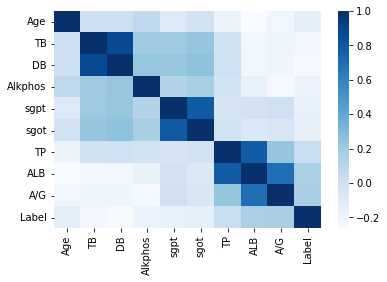

In [ ]:
# correlation heatmap
sns.heatmap(df.corr(), cmap = 'Blues');

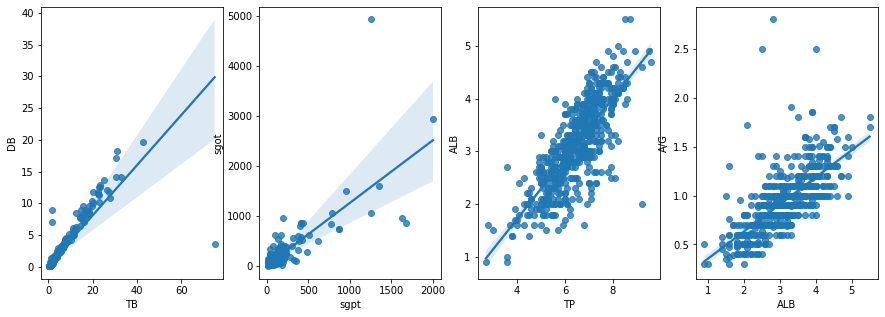

In [ ]:
# Linear regression plot
fig, axes = plt.subplots(1, 4, figsize = (15,5))
sns.regplot(ax = axes[0], x='TB', y='DB', data=df)
sns.regplot(ax = axes[1], x='sgpt', y = 'sgot', data=df)
sns.regplot(ax = axes[2], x='TP', y = 'ALB', data=df)
sns.regplot(ax = axes[3], x='ALB', y = 'A/G', data=df)

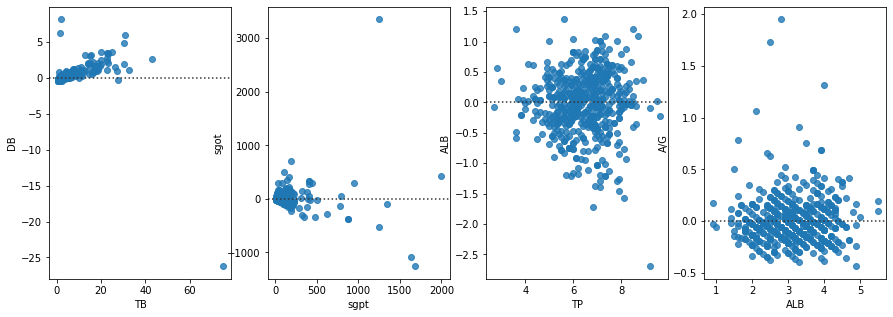

In [ ]:
# Residual plots
fig, axes = plt.subplots(1, 4, figsize = (15,5))
sns.residplot(ax = axes[0], x='TB', y='DB', data=df)
sns.residplot(ax = axes[1], x='sgpt', y = 'sgot', data=df)
sns.residplot(ax = axes[2], x='TP', y = 'ALB', data=df)
sns.residplot(ax = axes[3], x='ALB', y = 'A/G', data=df)

# Section 3: ML Classification

In [ ]:
#change Male and Female in 'Gender' to 0 and 1 so the data is easier to work with
df['Gender'] = df['Gender'].replace(['Male'],'0')
df['Gender'] = df['Gender'].replace(['Female'],'1')
df['Gender'] = df['Gender'].astype('int')

#normalize data using Standard Scaler Method
x = df.drop(['Label'], axis = 1)
y = df[['Label']]-1

x = preprocessing.StandardScaler().fit(x).transform(x.astype(float))
print(x)

[[ 1.24740264  1.77079482 -0.42031984 ...  0.29372174  0.20344649
  -0.14738974]
 [ 1.06230624 -0.56471817  1.21893587 ...  0.93965456  0.07746198
  -0.64846078]
 [ 1.06230624 -0.56471817  0.64037503 ...  0.47827397  0.20344649
  -0.17870668]
 ...
 [ 0.44531827 -0.56471817 -0.40424871 ... -0.07538274  0.07746198
   0.16577966]
 [-0.85035649 -0.56471817 -0.32389304 ...  0.29372174  0.329431
   0.16577966]
 [-0.4184649  -0.56471817 -0.37210644 ...  0.75510233  1.5892761
   1.73162664]]


In [ ]:
y.value_counts()

Label
0        414
1        165
dtype: int64

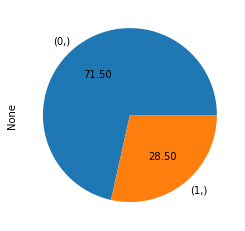

In [ ]:
#Show pie plot
y.value_counts().plot.pie(autopct = '%.2f')

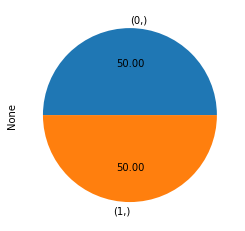

In [ ]:
#SMOTE for oversampling
sm = SMOTE(random_state = 42)
x_smote, y_smote = sm.fit_resample(x, y)
y_smote.value_counts().plot.pie(autopct = '%.2f')

In [ ]:
#Train Test Split
x_train, x_test, y_train, y_test = train_test_split(x_smote, y_smote, test_size=0.2, random_state=4)
print ('Train set:', x_train.shape,  y_train.shape)
print ('Test set:', x_test.shape,  y_test.shape)

Train set: (662, 10) (662, 1)
Test set: (166, 10) (166, 1)


In [ ]:
# Determine the best value for K in KNN classification
# For some reason, when I looped through all of the k values to find the most accurate one, the result was always k=1.
# Instead I decided to print the train_test accuracy score and test_set accuracy score for each value, and it still seems like the best value is 1
k = 2
knn = KNeighborsClassifier(n_neighbors = k).fit(x_train, y_train)

test_set_acc = metrics.accuracy_score(y_test, knn.predict(x_test))
print(test_set_acc)

temp = test_set_acc
for i in range(2, 40):
  knn_i = KNeighborsClassifier(n_neighbors = i).fit(x_train, y_train)
  
  train_set_acc_i = metrics.accuracy_score(y_train, knn_i.predict(x_train))
  test_set_acc_i = metrics.accuracy_score(y_test, knn_i.predict(x_test))
   
  print("Train set Accuracy for i = ", i , ": ", train_set_acc_i)
  print("Test set Accuracy for i = ", i , ": ", test_set_acc_i, '\n')
  
  if(test_set_acc_i > temp):
    temp = test_set_acc_i
    k = i
  
  print(k)

0.8012048192771084
Train set Accuracy for i =  2 :  0.947129909365559
Test set Accuracy for i =  2 :  0.8012048192771084 

2
Train set Accuracy for i =  3 :  0.877643504531722
Test set Accuracy for i =  3 :  0.7289156626506024 

2
Train set Accuracy for i =  4 :  0.8640483383685801
Test set Accuracy for i =  4 :  0.7168674698795181 

2
Train set Accuracy for i =  5 :  0.8051359516616314
Test set Accuracy for i =  5 :  0.6807228915662651 

2
Train set Accuracy for i =  6 :  0.8172205438066465
Test set Accuracy for i =  6 :  0.6927710843373494 

2
Train set Accuracy for i =  7 :  0.7870090634441088
Test set Accuracy for i =  7 :  0.6927710843373494 

2
Train set Accuracy for i =  8 :  0.7734138972809668
Test set Accuracy for i =  8 :  0.6807228915662651 

2
Train set Accuracy for i =  9 :  0.7462235649546828
Test set Accuracy for i =  9 :  0.6506024096385542 

2
Train set Accuracy for i =  10 :  0.7477341389728097
Test set Accuracy for i =  10 :  0.6626506024096386 

2
Train set Accuracy

In [ ]:
#Decision Tree Classifier
decision_tree = DecisionTreeClassifier(criterion = 'entropy', max_depth = 4)
decision_tree.fit(x_train, y_train)
predict_tree = decision_tree.predict(x_test)

print('Decision Tree Accuracy: ', metrics.accuracy_score(y_test, predict_tree))

Decision Tree Accuracy:  0.7048192771084337


In [ ]:
# #Random Forest Classifier
# accuracy = 0
# estimator = 0
# rand_state = 0

# for estimator_guess in range(1,200):
#   for random_state_guess in range(1,50):
    
#     random_forest = RandomForestClassifier(n_jobs = -1, n_estimators=estimator_guess, random_state=random_state_guess)
#     random_forest.fit(x_train, y_train)
#     predict_forest = random_forest.predict(x_test)
#     new_acc = metrics.accuracy_score(y_test, predict_forest)

#     if new_acc > accuracy:
#       accuracy = new_acc
#       estimator = estimator_guess
#       rand_state = random_state_guess

# print('The accuracy is ', accuracy, '\nn_estimators is ', estimator, '\nrandom state is ', rand_state)

KeyboardInterrupt: ignored

In [ ]:
# Logistic Regression
# Variables with some correlation: TB/DB, sgpt/sgot, TP/ALB, ALB/A/G
# Question: Can I choose only specific variables such as TB/DB?
LR = LogisticRegression(C = 0.01, solver = 'liblinear').fit(x_smote, y_smote)
predict_LR = LR.predict(x_test)
print(predict_LR, '\n')

# Find estimates for all classes
predict_LR_prob = LR.predict_proba(x_test)
print(predict_LR_prob)

[1 0 1 1 1 0 1 1 0 1 1 0 1 1 1 0 0 0 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1
 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 0 1 0 0 0 1 0 1 1 0 0 0 1 1 1 1 1 1
 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 0 1 0 1 0 0 1 1 0 0 1 1 1 1 1 0 0 1 0 1 1 1
 1 0 0 1 0 1 1 1 1 0 1 0 1 0 1 0 0 1 1 1 0 1 1 0 1 1 0 0 0 0 1 0 1 1 1 1 1
 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1] 

[[0.3742903  0.6257097 ]
 [0.80084828 0.19915172]
 [0.43192097 0.56807903]
 [0.37675952 0.62324048]
 [0.35962888 0.64037112]
 [0.53948903 0.46051097]
 [0.39978045 0.60021955]
 [0.44521094 0.55478906]
 [0.59731409 0.40268591]
 [0.44785937 0.55214063]
 [0.39326076 0.60673924]
 [0.56881843 0.43118157]
 [0.35824479 0.64175521]
 [0.35392551 0.64607449]
 [0.47833831 0.52166169]
 [0.51871443 0.48128557]
 [0.68151421 0.31848579]
 [0.82641541 0.17358459]
 [0.88280293 0.11719707]
 [0.46638337 0.53361663]
 [0.48843781 0.51156219]
 [0.37741515 0.62258485]
 [0.37731048 0.62268952]
 [0.35502465 0.64497535]
 [0.81282624 0.18717376]
 [0.488271   0.511729  ]
 [0.453145

In [ ]:
# Find the accuracy score of logistic regression
print('Logistic Regression Accuracy: ', metrics.accuracy_score(y_test, predict_LR))

Logistic Regression Accuracy:  0.7168674698795181
